# MNIST dataset
- Handwritten by school students and employees of the Census Bureau.
- Scikit-Learn provides many helper functions to download popular datasets.
The dataset loads:
- DESCR key describing the dataset 
- Data key containing an array with one row per instance and column per feature.
- Target key containing an array with labels 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

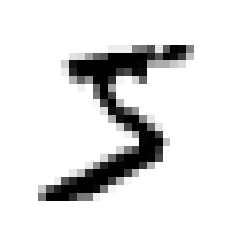

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
# Converting a string into an integer
import numpy as np
y = y.astype(np.uint8)

In [8]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [9]:
#Sensitive is solved with Shuffling the training dataset for better results
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a binary classifer
- True for the selected value and false for other values
- Stochastic Gradient Descent Classifer(SGD)
- SGD deals with independent instances one at a time.
- SGD uses randomness during training.
- SGD is better for Online training Models.


In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Performance measures
- measuring accuracy using cross-validation
- K-fold cross validation splits the training set into three folds.
- predictions and evalautions are carriedout on the split training dataset

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
print(n_correct / len(y_pred))

0.9666


In [14]:
# Now a cross validation method is used after cloning

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5, cv =3, scoring = "accuracy")

array([0.97135, 0.96255, 0.9666 ])

In [15]:
#Dumb  classifier which classifies every image in the "NOT-5" class
# Accuracy is not a good measure for Skewed Datasets.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y= None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)
    

In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.90795, 0.9103 , 0.9107 ])

# Confusion_matrix
- cross_val_predict method is used to predict each instance in the training dataset.
- Each row represents actual class and each column represents predicted class.
- First row of the matrix contains non-5 images called negative class(true negatives).
- Second row of the matrix classified as 5s called positive class(true positive).

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53677,   902],
       [ 1088,  4333]], dtype=int64)

In [19]:
# Pretend we have reached perfection

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision and Recall
- High Precision == positive predictions
- Recall is always good when its lower than precision
- Higher Recall == Negative predictions
- precision is low.
- This leads to a precision/recall tradeoff.

f1_score function() is used to combine precision and recall

SGDClassifier - makes its classification decision or each instance by computing a score using a decision function.
- If the score is greater than the threhold, it assigns the instance a positive class else assigns a negative class.

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8276981852913085

In [21]:
recall_score(y_train_5, y_train_pred)

0.799299022320605

In [22]:
#f1_score is used to combine precision and recall

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8132507507507506

In [23]:
# Using SGDClassifier -- decision function

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1006.36899625])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")
y_scores

array([-14054.8711975 ,  -6782.83686754, -18319.49557427, ...,
       -23916.21331683, -27794.85706481, -15080.97887822])

In [27]:
# This method is used to plot precision and recall

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

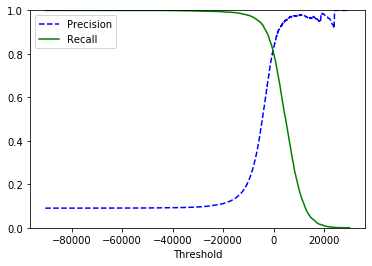

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1]),
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

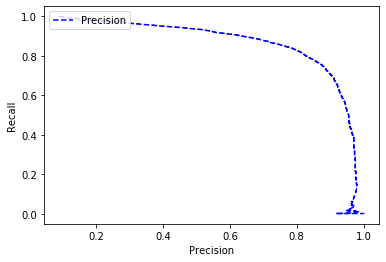

In [29]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
plt.show()

# ROC - Reciever Operation Characteristic
- It's a common tool used for Binary Classifiers
- plots true positive rate and false negative rate
- False negative rate, these are negative instances that are incorrectly classified as positive
- Trade off between false negative and true positive

In [30]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

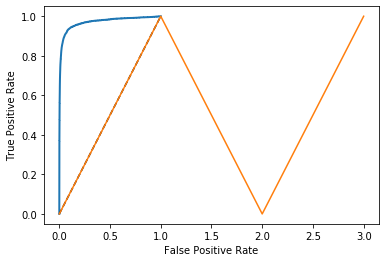

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth =  2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

# ROC AUC
- Area under the curve -- a perfect classifier will have a ROC AUC equal to 1
- Purely random classifier will have a ROC AUC equal to 0.5
- Precision/Recall curve is prefered whenever the positive class is rare or when you care more for the false positive than false negative.

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9697939511896735

# RandomForestClassifier
- Get scores for each instance in the training set
- Import predict_probas function from scikit-learn
- Predict_probas method returns an array containing a row per instance and a column per class

- Choose the appropriate metric for your task
- Evaluate your classifier using cross-validation
- Select the precision/recall tradeoff that fits your needs
- compare various models using ROC curves & ROC AUC scores.

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
# Score = proba of positive class

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

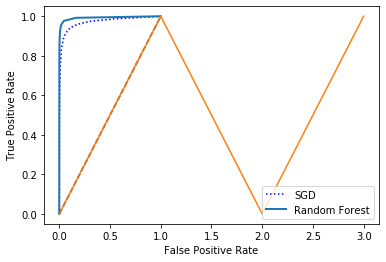

In [35]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9922475914722519

# Multiclass classification
- Binary classifiers distinguish between two classes
- Multiclass aka multinomial classifier distinguishes more than two classes
- Random Forest classifier or naive Bayes classifiers are capable of handling multiple classes
- Support vector machine classifier or Linear classifiers are strictly binary classifiers

However, we can use both methods using the following methods: 
- one-versus-all(OvA) strategy divides say 10 classes into 10 binary classifiers, decision score comes from each
- One-versus-one(OvO) strategy, N classes then trai N * (N - 1)/2 

OVO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets.
- SVM clsssifier uses OvO

In [37]:
# y_train is used not y_train_5
sgd_clf.fit(X_train, y_train) 
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-21200.61425912, -22046.74272815,  -6189.10055952,
          -536.92400167, -18285.27200598,   -398.65615309,
        -24177.98671454, -17207.67333807,  -8867.49234443,
        -13217.62059711]])

In [39]:
# Forcing Scikitleran to use One versus One or One versus all
# OneVsOneClassifier or OneVsRestClassifier classes

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([3], dtype=uint8)

In [40]:
len(ovo_clf.estimators_)

45

In [41]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [42]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87947411, 0.86689334, 0.89048357])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90806839, 0.89829491, 0.90433565])

# Error Analysis
- You need to divide each value in the confusion matrix by the number of image in the corresponding class
- compare error rate instead of absolute number of errors

In [45]:
# cross_val_predict function is used then the confusion matrix function
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5617,    0,   16,    7,    7,   37,   32,    5,  201,    1],
       [   0, 6429,   45,   20,    3,   40,    4,    7,  179,   15],
       [  25,   29, 5275,   90,   67,   20,   77,   41,  326,    8],
       [  29,   20,  119, 5286,    1,  205,   23,   39,  343,   66],
       [  12,   15,   43,   13, 5243,    8,   40,   26,  264,  178],
       [  32,   21,   33,  163,   51, 4489,   85,   17,  469,   61],
       [  28,   20,   49,    2,   34,   93, 5565,    8,  118,    1],
       [  20,   14,   54,   26,   48,    9,    5, 5708,  147,  234],
       [  19,   66,   44,   98,    3,  121,   34,    7, 5413,   46],
       [  25,   22,   32,   62,  127,   27,    1,  167,  297, 5189]],
      dtype=int64)

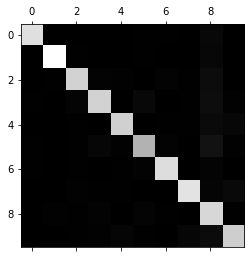

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

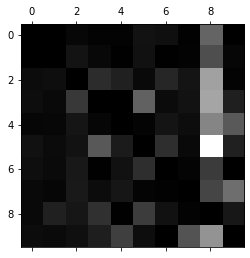

In [48]:
# Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel classification
- Used for facial recognition 


In [49]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")
f1_score

# Multioutput classification
- Create training set and test sets by taking the MNIST images and adding noise
- Pick the appropriate precision/recall tradeoff
- Compare classifiers
- Build good classification systems for a variety of tasks

In [52]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test